In [11]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn import tree

In [12]:
digits = datasets.load_digits()
X = digits.data
Y = digits.target

In [13]:
df = pd.DataFrame(X)
digits_encoded = pd.get_dummies(df)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,pd.DataFrame(Y),test_size = 0.35,random_state = 35)

In [17]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="gini",max_leaf_nodes=35)

In [18]:
DT.fit(X_train,y_train)


DecisionTreeClassifier(max_leaf_nodes=35)

In [19]:
DT.score(X_test,y_test)*100

78.37837837837837

In [20]:
targets_names = digits.target_names.astype(str)

In [22]:
from sklearn.metrics import classification_report
classification_report(y_test, DT.predict(X_test), target_names=targets_names)

'              precision    recall  f1-score   support\n\n           0       0.98      0.95      0.97        60\n           1       0.75      0.71      0.73        58\n           2       0.88      0.74      0.81        62\n           3       0.73      0.76      0.74        63\n           4       0.76      0.73      0.75        71\n           5       0.92      0.83      0.87        69\n           6       0.88      0.97      0.92        62\n           7       0.88      0.78      0.83        65\n           8       0.52      0.71      0.60        52\n           9       0.62      0.66      0.64        67\n\n    accuracy                           0.78       629\n   macro avg       0.79      0.78      0.79       629\nweighted avg       0.80      0.78      0.79       629\n'

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision_score(y_test, DT.predict(X_test),average='weighted')

0.7966241512507132

In [24]:
recall_score(y_test, DT.predict(X_test),average='weighted')

0.7837837837837838

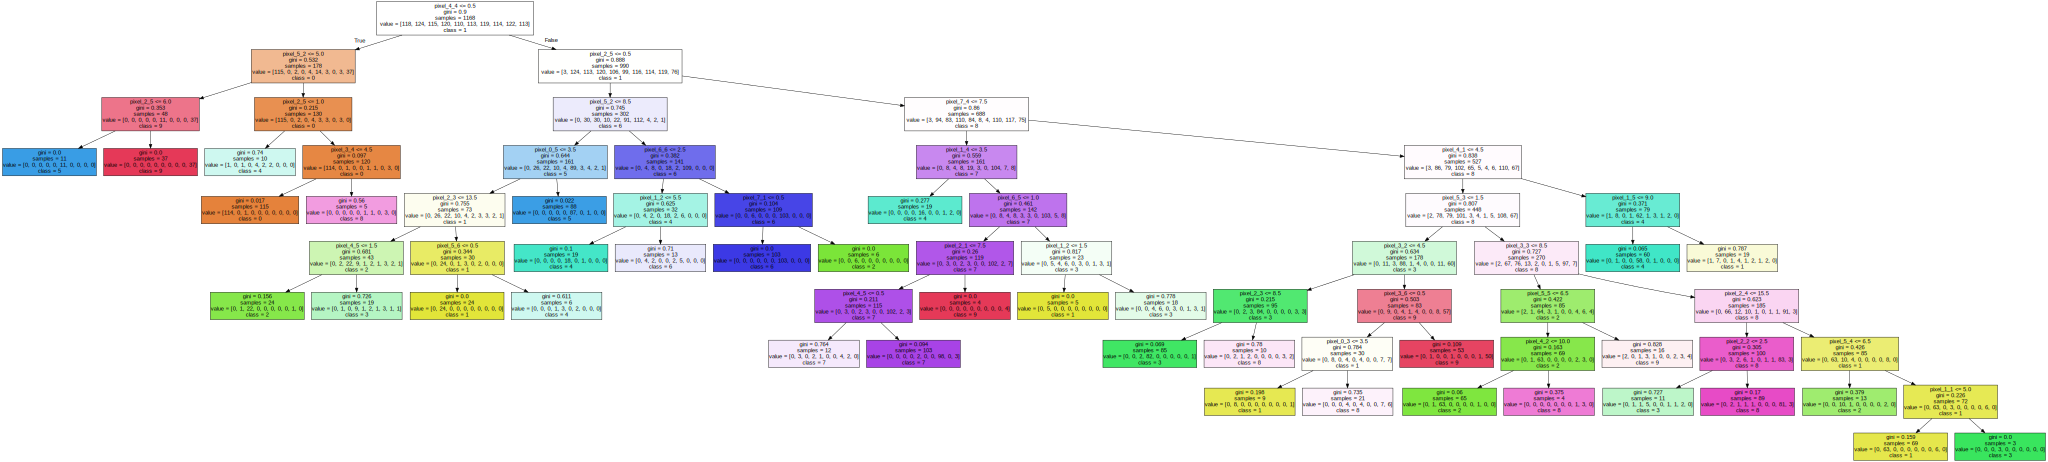

In [28]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(DT, out_file=None, 
                                feature_names=digits.feature_names,  
                                class_names=targets_names,
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph